# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import boston_valuation as val

%matplotlib inline

# Gather Data

[Source : Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

#dont forget we have to convert this to a dataframe

sklearn.utils.Bunch

In [4]:
dir(boston_dataset)

#Used to check attributes of a python object

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Datapoints and Features

In [6]:
type(boston_dataset.data)

numpy.ndarray

In [7]:
boston_dataset.data.shape
#We are chaining our attributes here

(506, 13)

In [8]:
#Attribute is a word used in both ML and python but with different meaning

boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston_dataset.target
#Actual Prices in thousands

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

# Data Exploration with Pandas dataframes

In [14]:
#Creating a pandas dataframe
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

#Adding a column with price-tag of all houses
data["Price"] = boston_dataset.target

In [15]:
#Getting an insight into dataframe without printing it, as usually we work with huge datas
data.head()



CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [18]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [13]:
data.count()

#in ML- rows=instances
#in python- instance is an object, for ef dataframe will be a general category 

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

## Cleaning data -check for missing values

In [21]:
pd.isnull(data).any()

#null does not mean 0


CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualising Data- Histograms, Distributions and Bar Charts

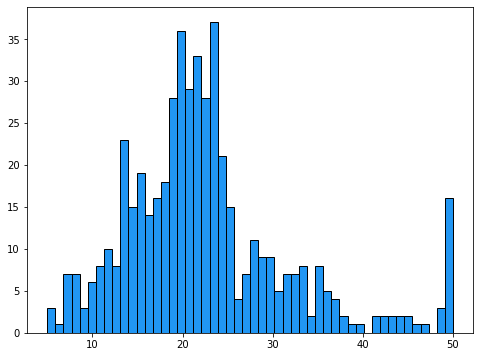

Text(0, 0.5, 'Number of houses')

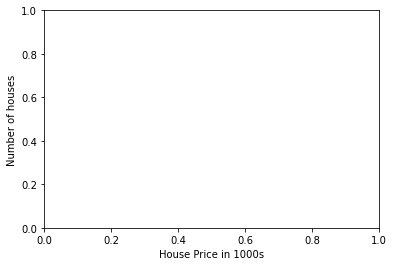

In [16]:
plt.figure(figsize = (8,6))
plt.hist(data['Price'], bins = 50, ec = 'black', color = '#2196F3')
plt.show()
plt.xlabel('House Price in 1000s')
plt.ylabel('Number of houses')

<Figure size 576x432 with 0 Axes>

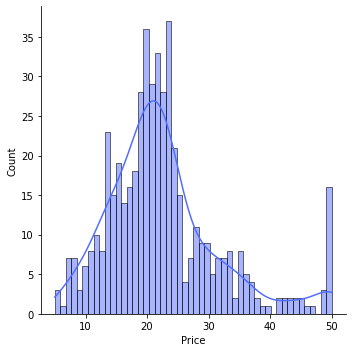

In [17]:
plt.figure(figsize = (8,6))
sns.displot(data['Price'], bins = 50, kde = True, color = '#536dfe')
#The line is the probability distribution function which is superimposed

Text(0, 0.5, 'Number of houses')

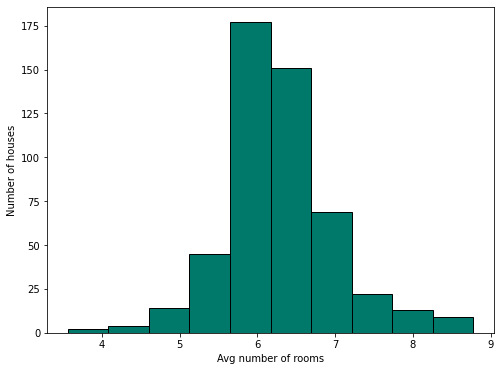

In [18]:
plt.figure(figsize = (8,6))
plt.hist(data['RM'], ec = 'black', color = '#00796b')

plt.xlabel('Avg number of rooms')
plt.ylabel('Number of houses')

In [19]:
data['RM'].mean()

6.284634387351787

In [20]:
#Need to analyse RAD data better
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

Text(0, 0.5, 'Number of houses')

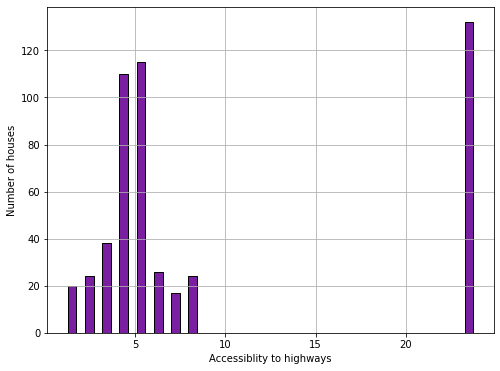

In [21]:
plt.figure(figsize = (8,6))
plt.hist(data['RAD'], bins = 24, ec = 'black', color = '#7b1fa2', rwidth = 0.5)

plt.grid()
plt.xlabel('Accessiblity to highways')
plt.ylabel('Number of houses')

In [22]:
frequency = data['RAD'].value_counts()
#type(frequency)
#frequency.index(this basically is the whole left column)
frequency.axes[0]

#Basically using the axes attriute to pull out a column straightaway from the dataset

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

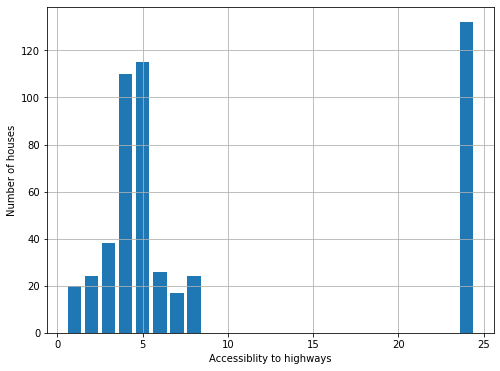

In [23]:
#Creating a bar chart
plt.figure(figsize = (8,6))
plt.bar(frequency.index, height = frequency)

plt.xlabel('Accessiblity to highways')
plt.ylabel('Number of houses')
plt.grid()

In [24]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive Statistics

In [25]:
data['Price'].min()

5.0

In [26]:
data['Price'].max()

50.0

In [27]:
data['Price'].mean()

22.532806324110698

In [28]:
data['Price'].median()

21.2

In [29]:
data['Price'].mode()

0    50.0
dtype: float64

In [30]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
Price        5.00000
dtype: float64

In [31]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

 ## Correlation
 
 ## $$ \rho_{XY}=corr(X,Y)$$
 ## $$ -1.0 \leq \rho _{XY} \leq 1.0$$

In [32]:
data['Price'].corr(data['RM'])

0.6953599470715394

In [33]:
data['Price'].corr(data['PTRATIO'])

-0.5077866855375621

In [34]:
#Getting all correlations at one shot
data.corr()
#Pearson corelation coefficients
#pearson os only valid for real continous variables



#So high corelation between 2 parameters will usually not be good for your regression model as it just makes one of 
#those featurs completely redundant

#Corelation does not automatically imply causation

#Multicollinearity is when two or more parameters are highly related to each other, bit more complicated than this, but yeah

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [35]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<function matplotlib.pyplot.show(close=None, block=None)>

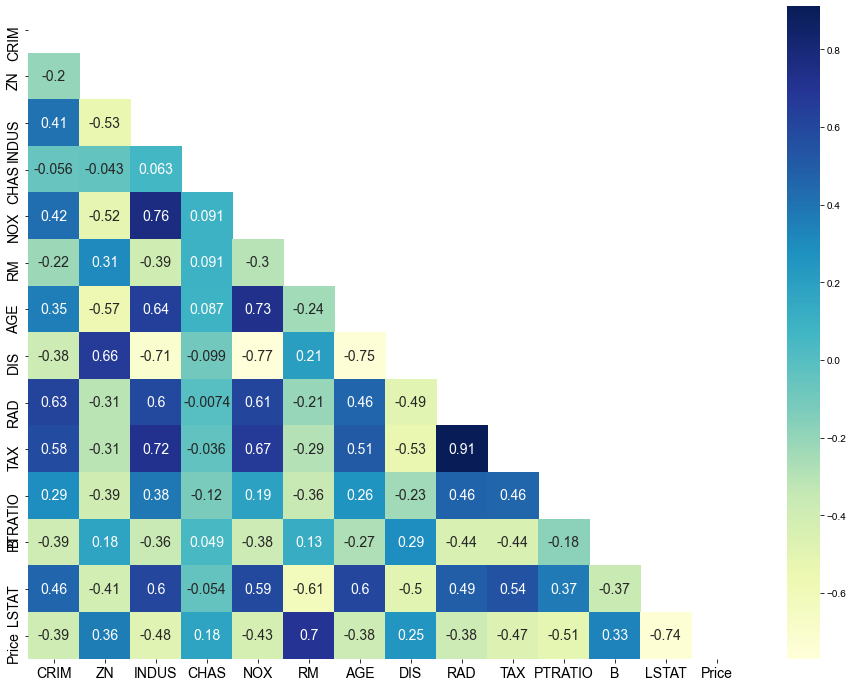

In [36]:
plt.figure(figsize = (16,12))
sns.heatmap(data.corr(), cmap = 'YlGnBu', mask = mask, annot = True, annot_kws = {'size':14})
#First mask is a variable and we equate it to the mask we have created in the cell above
#curly bracket notation and key:value pair- python dictionary
sns.set_style('dark')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

In [37]:
#Observe that corelation will not be valid for the RAD, CHAS variable as it is not continous

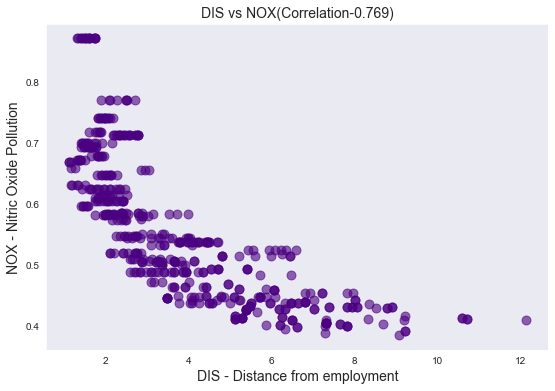

In [38]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']), 3)
#the round function here rounds up the corelation value to 3 decimal places as mentioned


plt.figure(figsize = (9,6))
plt.title(f'DIS vs NOX(Correlation{nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.scatter(data['DIS'], data['NOX'], alpha = 0.6, s = 80, color = 'Indigo')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

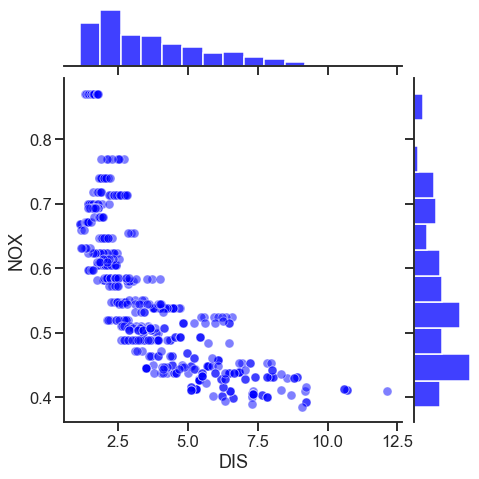

In [39]:
sns.set_style('ticks', {"xtick.major.size": 10, "ytick.major.size": 8})
sns.set_context('talk')
sns.jointplot(x = data['DIS'], y = data["NOX"], height = 7, color = 'Blue', joint_kws = {'alpha':0.5})

#Do observe here the different ways in whoch alpha is used in matplotlib and in seaborn
plt.show

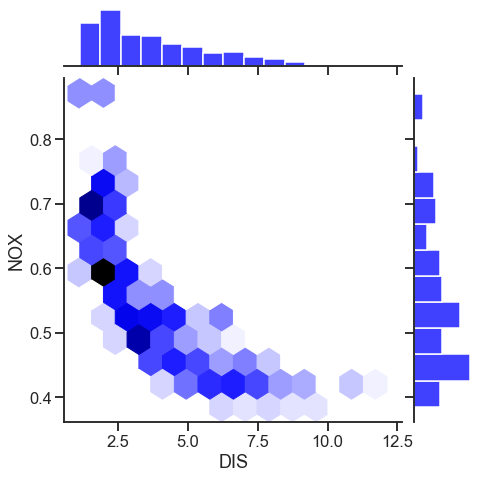

In [40]:
sns.set_style('ticks', {"xtick.major.size": 10, "ytick.major.size": 8})
sns.set_context('talk')
sns.jointplot(x = data['DIS'], y = data["NOX"], height = 7, color = 'Blue', kind = 'hex')
plt.show()
#Here we are aggregating the data in an hexagonal grid and accordingly varying the density

<function matplotlib.pyplot.show(close=None, block=None)>

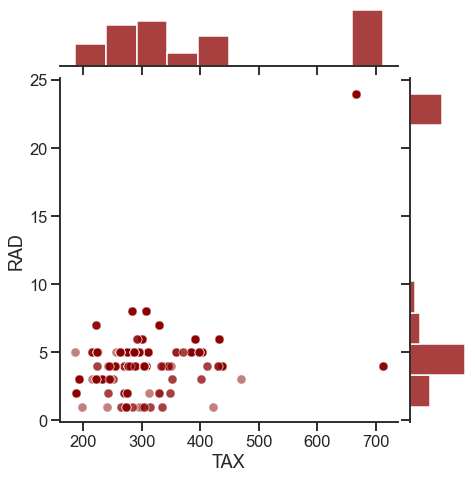

In [81]:
sns.set_style('ticks', {"xtick.major.size": 10, "ytick.major.size": 8})
sns.set_context('talk')
sns.jointplot(x = data['TAX'], y = data["RAD"], height = 7, color = 'darkred', joint_kws = {'alpha':0.5})

#Do observe here the different ways in whoch alpha is used in matplotlib and in seaborn
plt.show

#The corelation we got is 0.91, very high, the explanationa
#1. Data is not continous
#2. Outliers in the graph

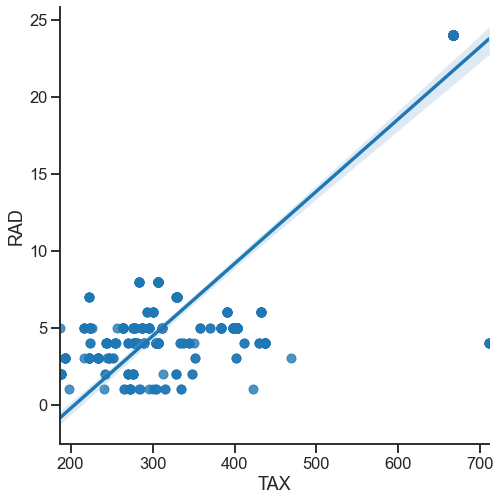

In [82]:
sns.lmplot(x = 'TAX', y = 'RAD', data = data, height = 7)

#Observe the regression line and think that the insight is not so useful as the outliers are changing the course of the line significantly


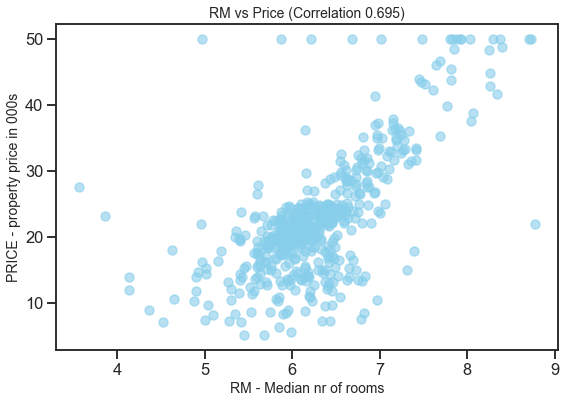

In [83]:
rm_tgt_corr = round(data['Price'].corr(data['RM']), 3)
#the round function here rounds up the corelation value to 3 decimal places as mentioned


plt.figure(figsize = (9,6))
plt.scatter(x=data['RM'], y=data['Price'], alpha=0.6, s=80, color='skyblue')

plt.title(f'RM vs Price (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms', fontsize=14)
plt.ylabel('PRICE - property price in 000s', fontsize=14)
plt.show()

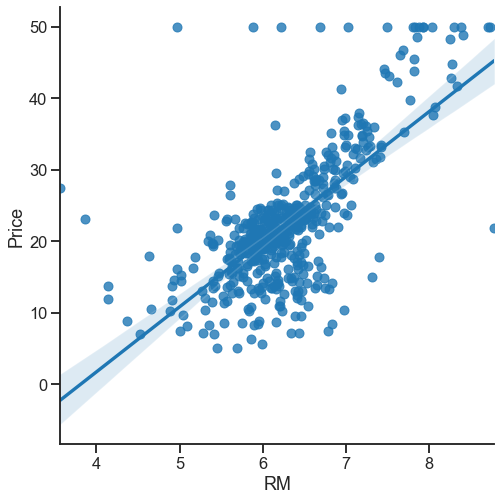

In [84]:
sns.lmplot(x='RM', y='Price', data=data, height=7)
plt.show()

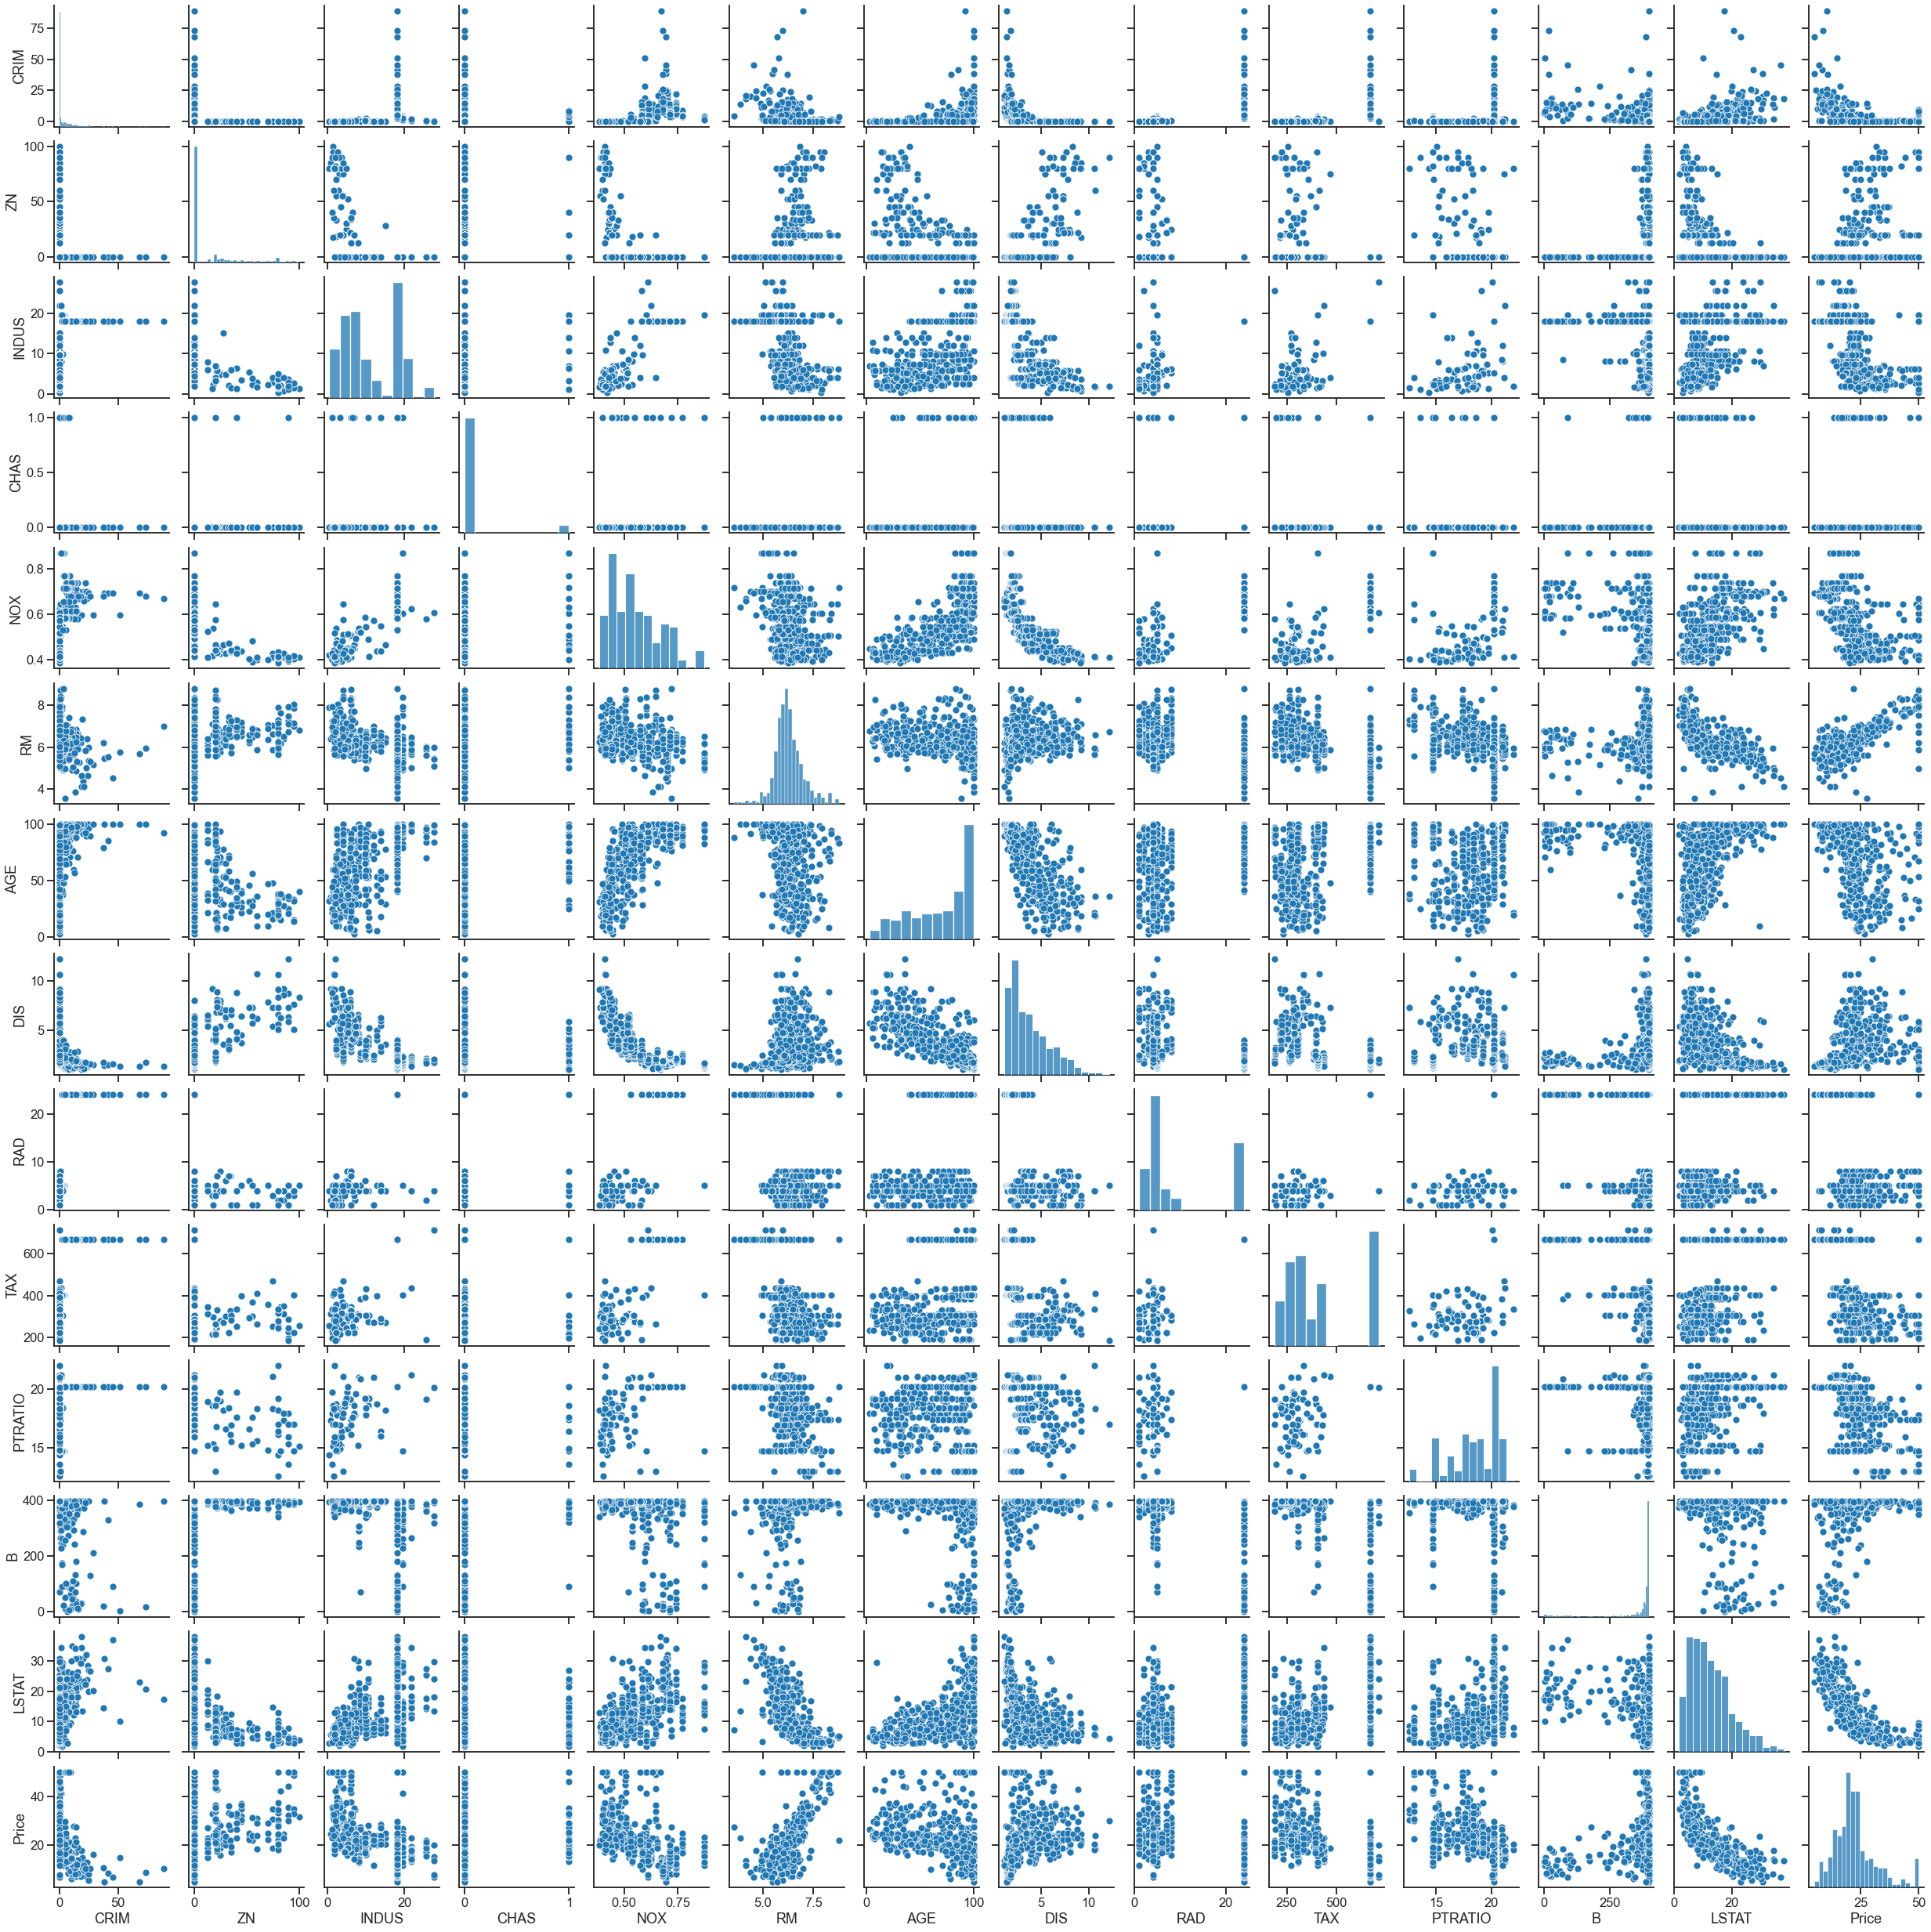

CPU times: user 15.1 s, sys: 233 ms, total: 15.4 s
Wall time: 14.9 s


In [85]:
%%time
#the line above is a jupyter notebook specefic command which can be used to calculate time a cell takes to run 
sns.pairplot(data)
plt.show()

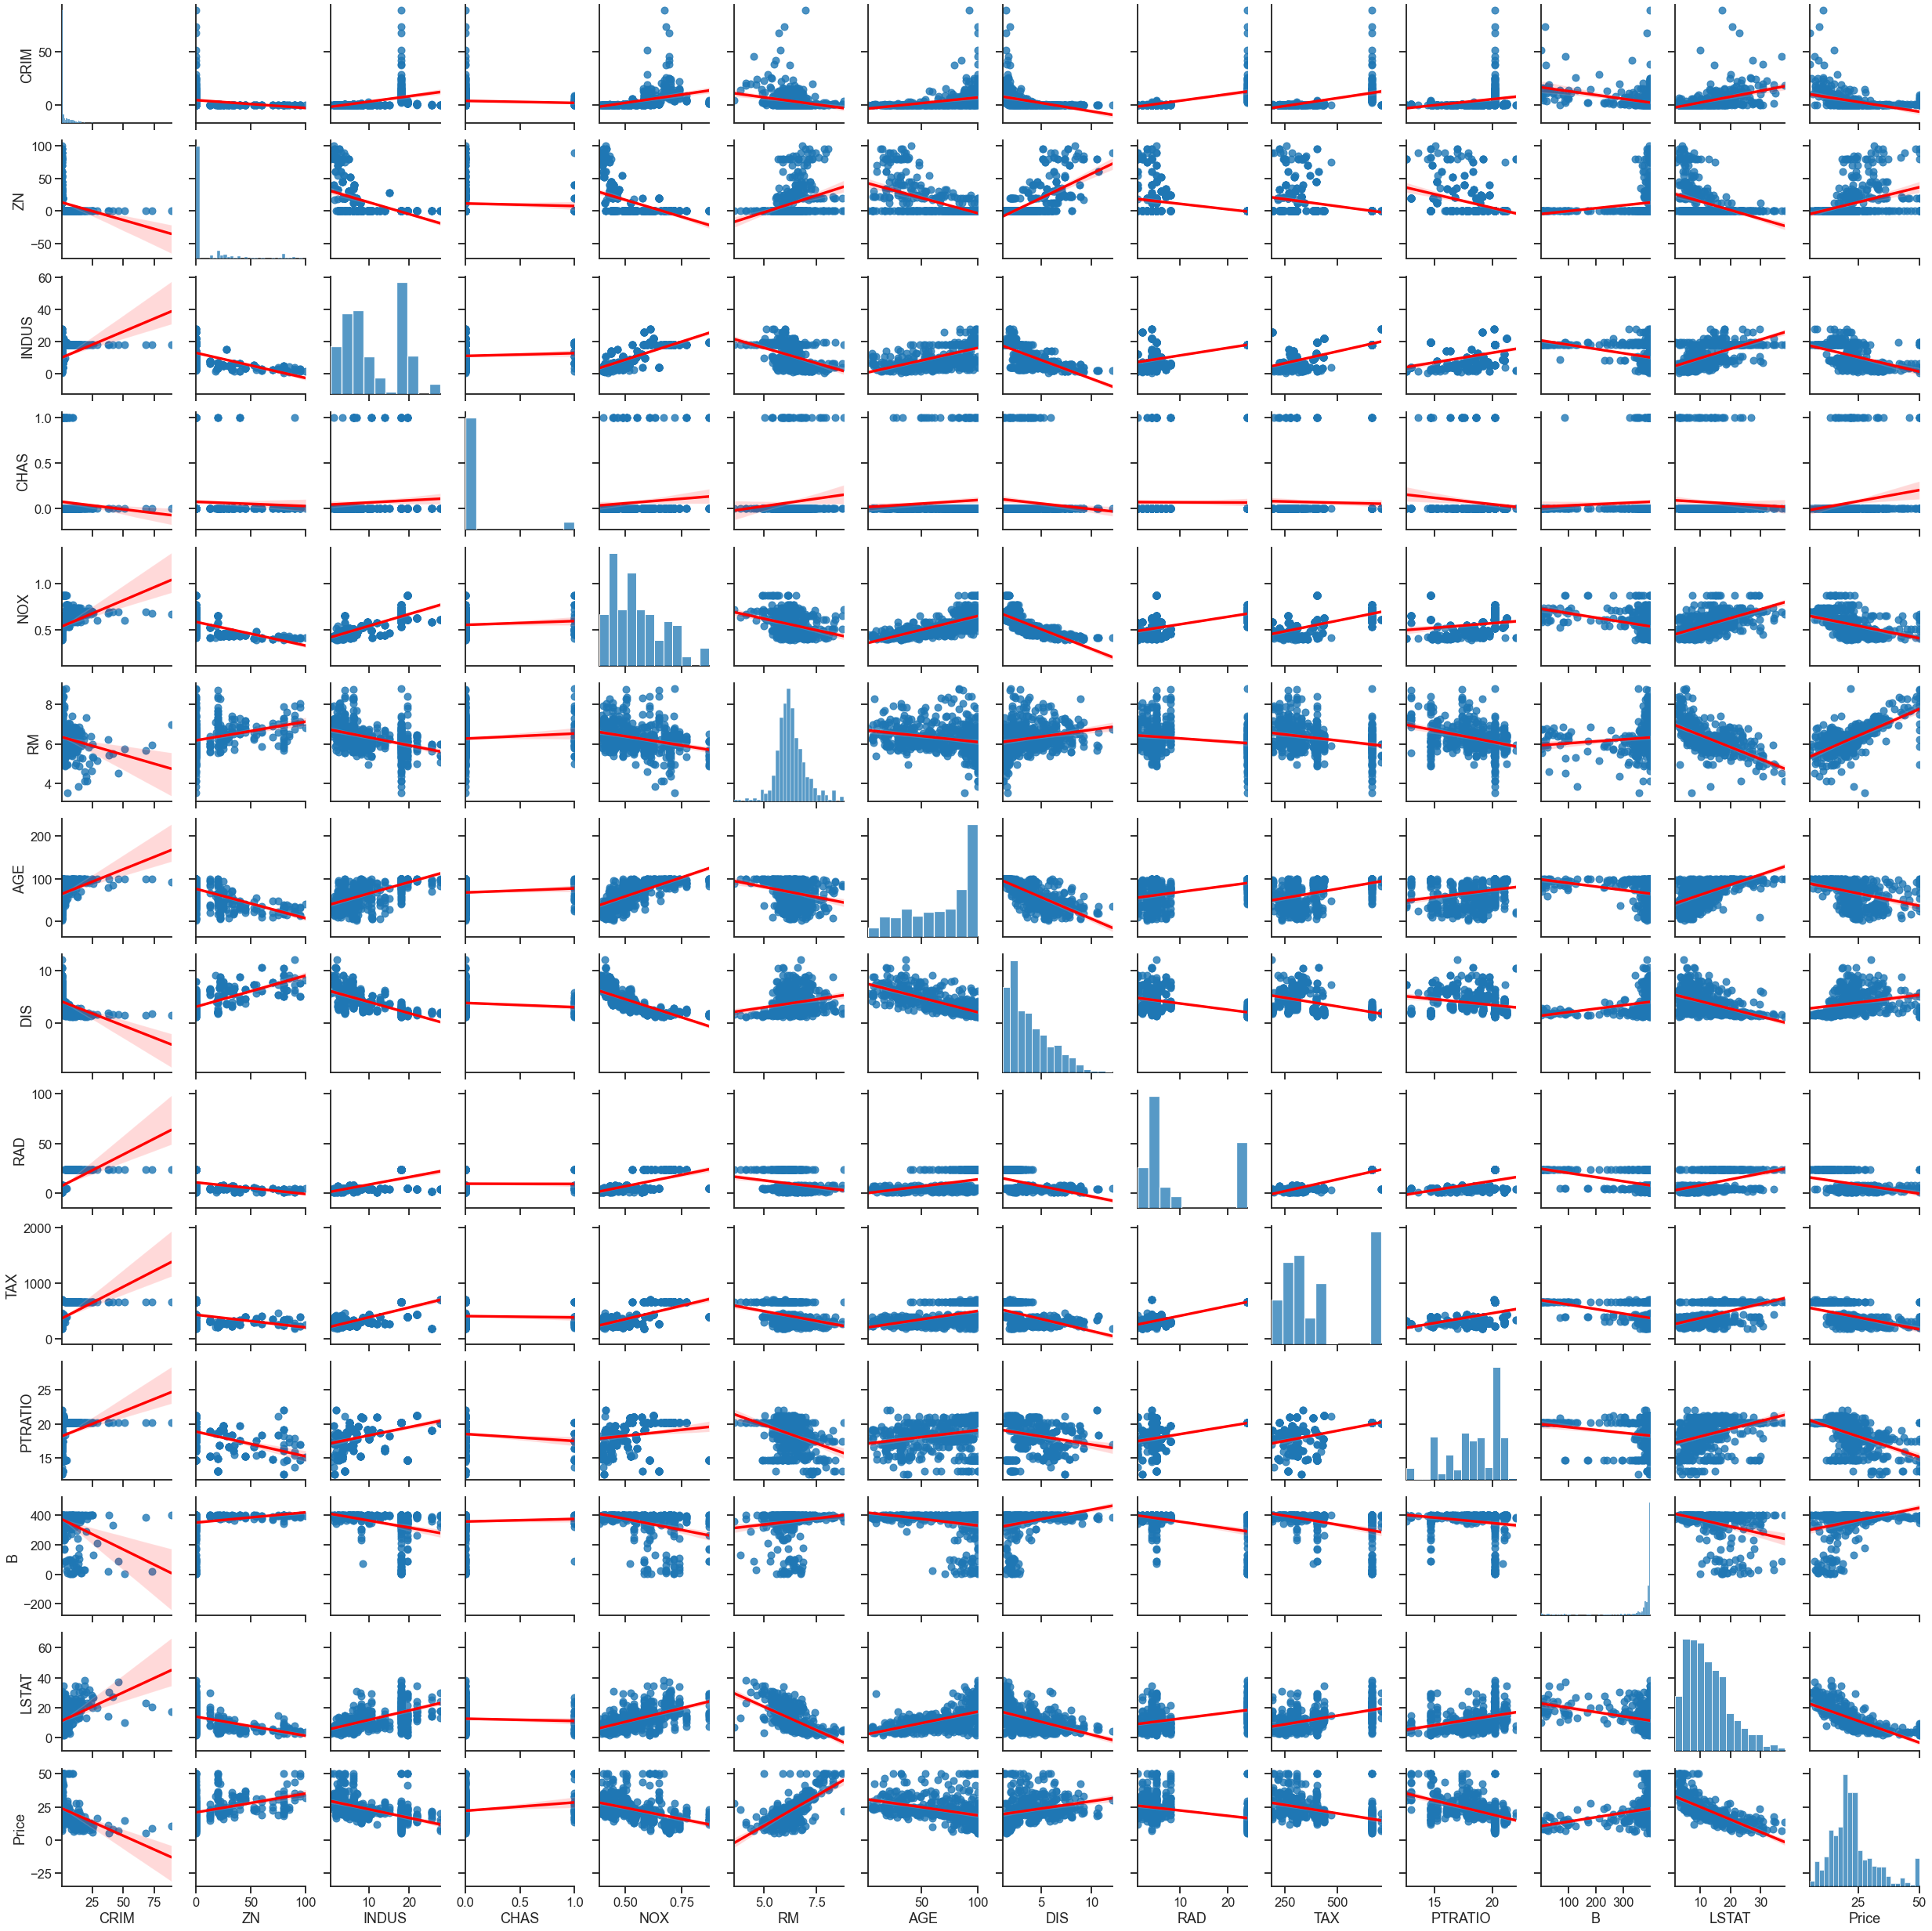

CPU times: user 3min 15s, sys: 40 s, total: 3min 55s
Wall time: 53 s


In [86]:
%%time
#the line above is a jupyter notebook specefic command which can be used to calculate time a cell takes to run 
sns.pairplot(data, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

## Training & Test Dataset Split

In [47]:
prices = data['Price']
features = data.drop('Price', axis = 1)

#Tuple unpacking
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)
#The last random state argument is not necessary and here is required only to get the data shuffeled in the same manner as in the video

#Why split the data?
#Split is done to remove any order if we got while generating the data
#Eg. why we shuffle a new set of playing cards?

# verifying the % of dataset
len(x_train)/len(features)



0.7984189723320159

In [48]:
#Another way of verifying
x_train.shape[0]/features.shape[0]

0.7984189723320159

## Multivariable Regression

In [49]:
regr = LinearRegression()
regr.fit(x_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = x_train.columns, columns = ['coef'])

#columns = ['coef'] adds the small coef on top


#Bruh moment -  this is so awesome, as you are basically working with an equation and these are the coefficients, 
#we can basically calculate how much we can charge for say an extra room(approx 3.1k) or property near river(approx 2k)


#printing r-square
print('Training data r squared: ', regr.score(x_train, y_train))
print('Testing data r squared: ', regr.score(x_test, y_test))


#The test data is like sample being tested on the model we got by using train data. hence getting a lesser r-squared
#and approx what accuracy we will get in real life

print('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = x_train.columns, columns = ['coef'])

#columns = ['coef'] adds the small coef on top

Intercept 36.533051382824894
Training data r squared:  0.750121534530608
Testing data r squared:  0.6709339839115652
Intercept 36.533051382824894


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

## Data Transformations

In [50]:

data['Price'].skew()

#As we observe a right skew over here, we call the ln function and then try to plot the regression chart

1.1080984082549072

In [51]:
y_log = np.log(data['Price'])

# we are not using the math library here as the log function from there cant be applied on a complete dataset

In [52]:
y_log.skew()

-0.33032129530987864

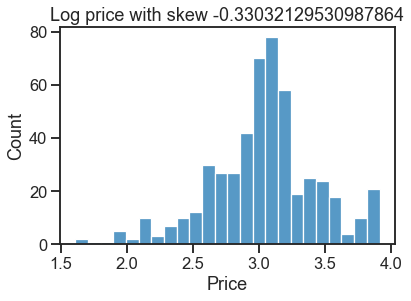

In [53]:
sns.histplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

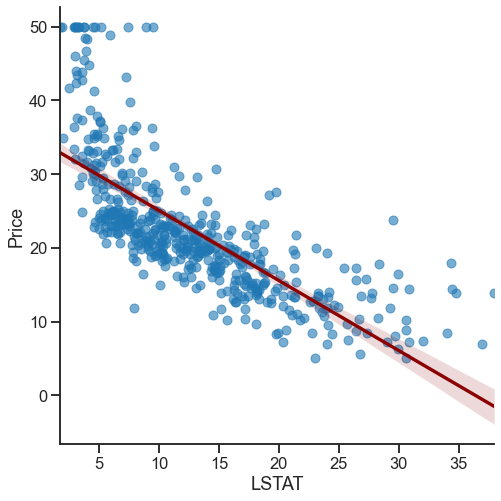

In [54]:
sns.lmplot(x = 'LSTAT', y = 'Price', data = data, height = 7, 
           scatter_kws = {'alpha': 0.6}, line_kws = {'color': 'darkred'})

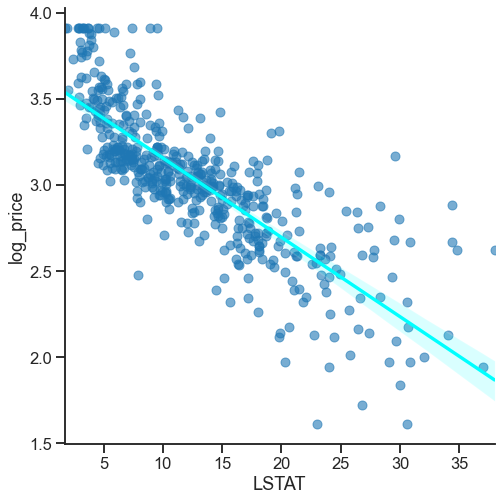

In [55]:
transformed_data = features
transformed_data['log_price'] = y_log


sns.lmplot(x = 'LSTAT', y = 'log_price', data = transformed_data, height = 7, 
           scatter_kws = {'alpha': 0.6}, line_kws = {'color': 'cyan'})

## Regression using log prices

In [56]:
prices = np.log(data['Price']) #Using log prices
features = data.drop('Price', axis = 1)

#Tuple unpacking
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)
#The last random state argument is not necessary and here is required only to get the data shuffeled in the same manner as in the video

#Why split the data?
#Split is done to remove any order if we got while generating the data
#Eg. why we shuffle a new set of playing cards?

# verifying the % of dataset
len(x_train)/len(features)

0.7984189723320159

In [57]:
regr = LinearRegression()
regr.fit(x_train, y_train)

print('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = x_train.columns, columns = ['coef'])

#columns = ['coef'] adds the small coef on top


#printing r-square
print('Training data r squared: ', regr.score(x_train, y_train))
print('Testing data r squared: ', regr.score(x_test, y_test))


#The test data is like sample being tested on the model we got by using train data. hence getting a lesser r-squared
#and approx what accuracy we will get in real life

print('Intercept', regr.intercept_)
pd.DataFrame(data = regr.coef_, index = x_train.columns, columns = ['coef'])

#columns = ['coef'] adds the small coef on top

Intercept 4.059943871775209
Training data r squared:  0.7930234826697583
Testing data r squared:  0.7446922306260741
Intercept 4.059943871775209


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [58]:
# Charles River Property Premium
np.e**0.080475
#observe how this completely changes

1.0838017512597784

## p values and evaluating coefficients

In [59]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
# this sm.OLS function is basically for linear regression

results = model.fit()
# Forgot the parenthesies 


#results.params
#results.pvalues
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

coef  p-value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

In [60]:
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

## Test for multicollinearity

$$ TAX = \alpha_0 + \alpha_1RM + \alpha_2NOX + ...... + \alpha_{12}LSTAT$$
$$VIF_{TAX} = \frac{1}{1-R_{TAX}^2}$$

In [61]:
variance_inflation_factor(exog = x_incl_const.values, exog_idx = 1)

#The values attribute os used here to convert x_incl_cont from a dataframe to a array
x_incl_const.shape

(404, 14)

In [62]:
vif = [] #Empty list
for n in range(14):
    vif.append(variance_inflation_factor(exog = x_incl_const.values, exog_idx = n))
    
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674636, 1.0788133385000578, 4.410320817897634, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793035]


In [63]:
#another syntaxt for the same task as done in the cell above
vif = [variance_inflation_factor(exog = x_incl_const.values, exog_idx = n)for n in range(x_incl_const.shape[1])]


#To make it look better
pd.DataFrame({'coef name':x_incl_const.columns,
              'vif':np.round(vif, 2)})

#vif greater then 10- issue

coef name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

## Model Simplification & the BIC

In [64]:
# Original model with log prices and all features

x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

# Challenge: find and check official docs for results object and print out BIC & r-squared
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -139.74997769478875
r-squared is 0.7930234826697582


In [65]:
#Reduced model #1 excluding INDUS

x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS'], axis = 1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

#R-squared remains almost the same and BIC reduces

BIC is -145.1450885559114
r-squared is 0.7927126289415162


In [66]:
#Reduced model #2 excluding INDUS and AGE

x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS', 'AGE'], axis = 1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

#R-squared remains almost the same and BIC reduces
#Do not think this is usually the case, try removing something like LSTAT and you will realise

BIC is -149.49934294224678
r-squared is 0.7918657661852815


In [67]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis =1)

#We can also remove TAX 

coef  p-value      coef  p-value      coef  p-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residuals and Residual plots

In [68]:
#Modified model : transformed (Using log prices) & simplified(dropping 2 features)

prices = np.log(data['Price']) #Using log prices
features = data.drop(['Price', 'INDUS', 'AGE'], axis = 1)

#Tuple unpacking
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)

#Using stats model
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

#Residuals
residuals = y_train - results.fittedvalues
residuals

50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

In [69]:
type(residuals)

pandas.core.series.Series

In [70]:
#As its a pandas series we can use various attributes
residuals.describe()

count    4.040000e+02
mean     2.616169e-16
std      1.841779e-01
min     -7.330963e-01
25%     -9.881733e-02
50%     -1.499545e-02
75%      9.870289e-02
max      7.907087e-01
dtype: float64

In [71]:
#Another built in method for calculating residuals
results.resid

50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

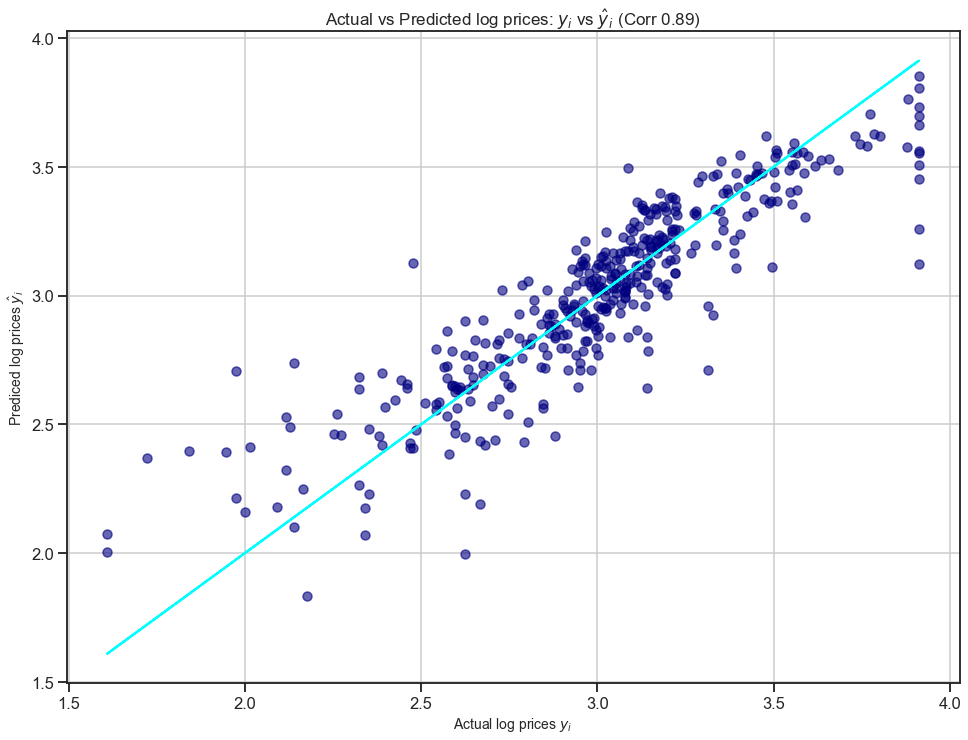

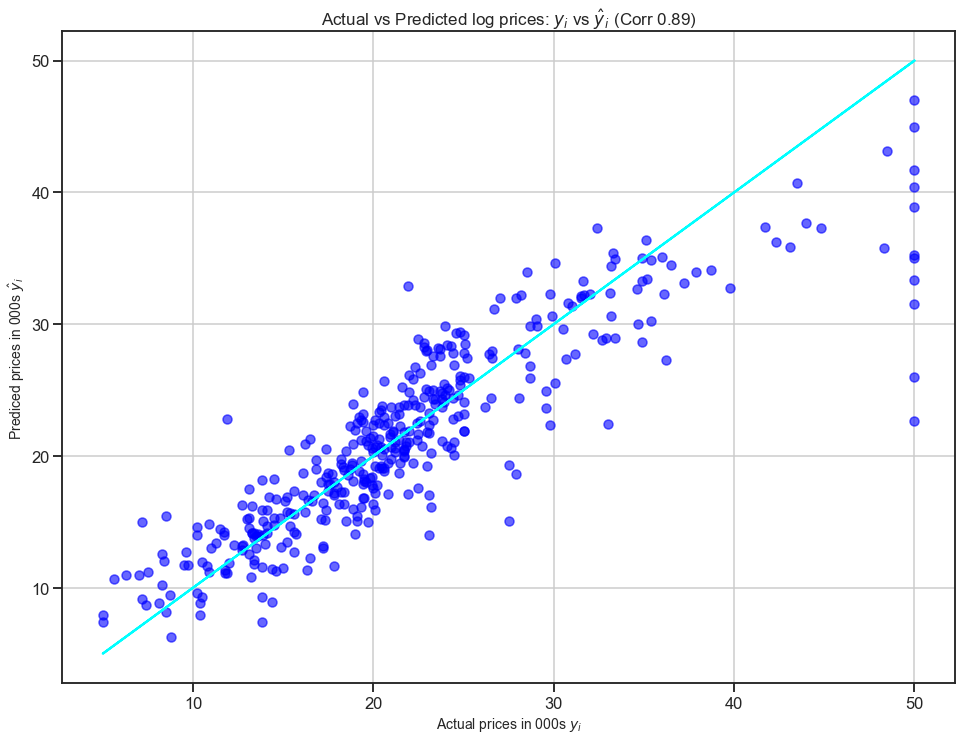

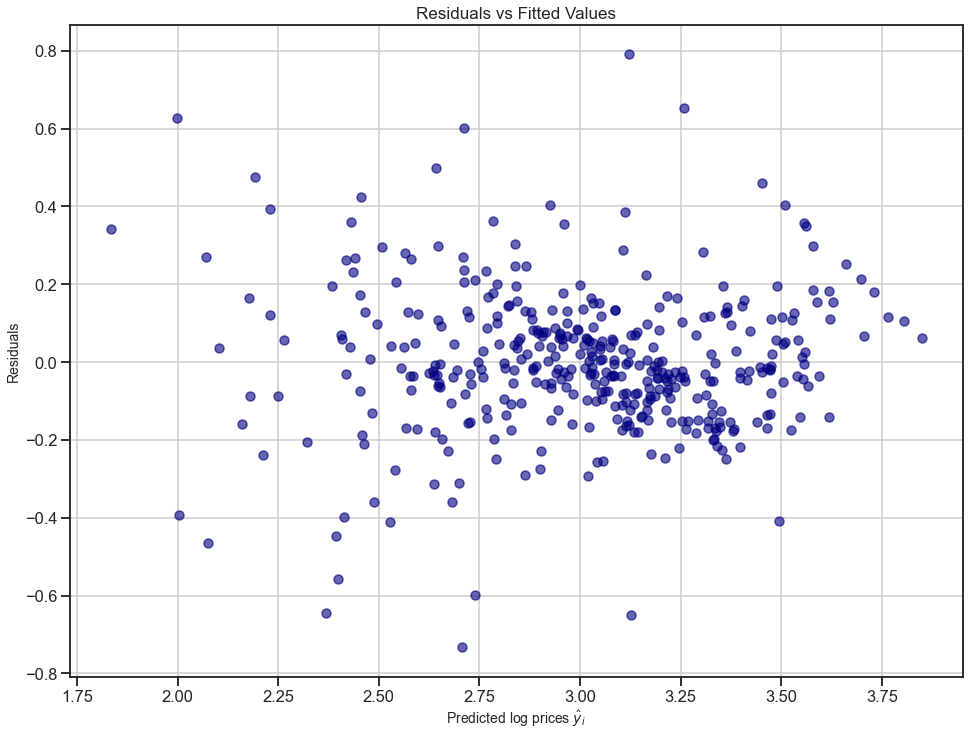

In [72]:
#Graph of Actual vs Predicted values
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize = (16,12))
plt.grid()
plt.scatter(x = y_train, y = results.fittedvalues, c='navy', alpha = 0.6)
plt.plot(y_train, y_train, color = 'cyan')
#This cyan line represents a perfect prediction line

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()


plt.figure(figsize = (16,12))
plt.grid()
plt.scatter(x = np.e**y_train, y = np.e**results.fittedvalues, c='blue', alpha = 0.6)
plt.plot(np.e**y_train, np.e**y_train, color = 'cyan')
#This cyan line represents a perfect prediction line

plt.xlabel('Actual prices in 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices in 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

# Residuals vs Predicted values
plt.figure(figsize = (16,12))
plt.grid()
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)


plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

Text(0.5, 1.0, 'Log price model: residuals Skew(0.118) Mean(0.0)')

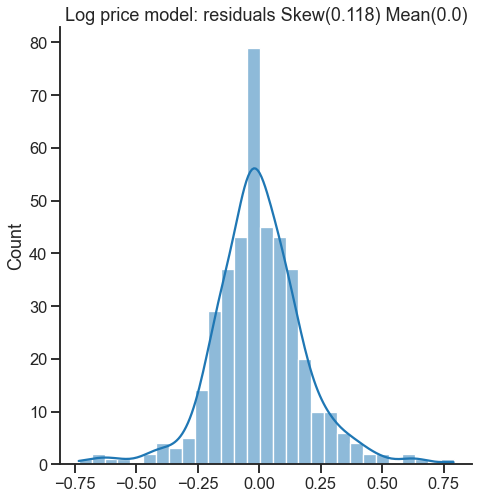

In [73]:
#Checking for normality

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)


sns.displot(results.resid,  kde=True, height=7)
plt.title(f'Log price model: residuals Skew({resid_skew}) Mean({round(results.resid.mean(), 3)})')


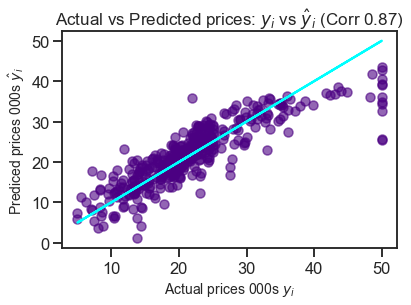

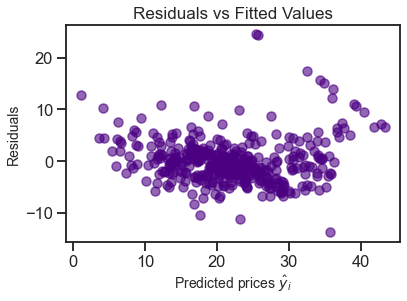

/Users/adityasomani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


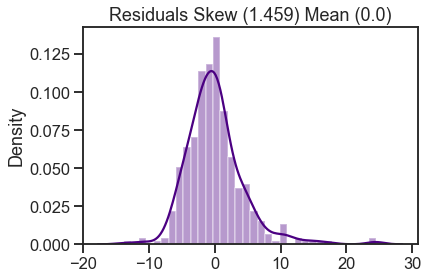

In [74]:
# Original model: normal prices & all features
prices = data['Price']
features = data.drop(['Price'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

#See al the graphs and observe that we have improved a lot by removing stuff, here residuals vs predicted prices
#sort of do have a pattern

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

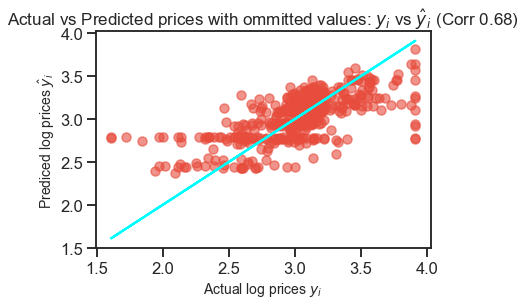

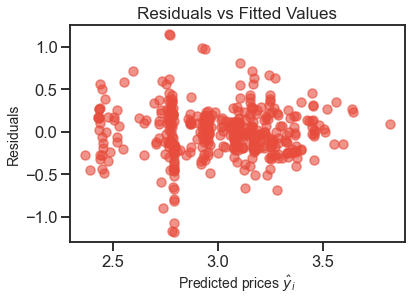

In [75]:
# Model ommiting key features using log prices
prices = np.log(data['Price'])
features = data.drop(['Price', 'INDUS', 'AGE', 'LSTAT', 'RM', "NOX", 'CRIM'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with ommitted values: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [76]:
pd.DataFrame({'R-squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared], 
              'MSE':[reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE':np.round(np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse]), 3)}, 
              index=['Reduced Log Model', 'Full Normal Price model', 'Omitted Var Model'])

#Do observe that the first and third row have MSE value in log prices while second row has it in 000's hence 
#we cant compare straightaway

R-squared     MSE   RMSE
Reduced Log Model            0.792   0.035  0.187
Full Normal Price model      0.750  19.921  4.463
Omitted Var Model            0.460   0.090  0.300

In [77]:
# Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 s.d. for log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. for log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)

print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. for log prices is 0.18708286933869708
2 s.d. for log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155


In [78]:
30000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000 
# Wrong! Add first. Transform afterwards. 
#Very Importantz

31453.778077746647

In [79]:
val.get_dollar_estimate(8, 15, False)

The estimated property value is 755000.0.
At 95% confidence the valuation range is
USD 519000.0 at the lower end to USD 1099000.0 at the high end.


In [80]:
val.get_dollar_estimate(5, 20, True, False)

The estimated property value is 530000.0.
At 68% confidence the valuation range is
USD 439000.0 at the lower end to USD 639000.0 at the high end.
